<a href="https://colab.research.google.com/github/JohnalEco/Hurtos_Medellin/blob/main/relacion_hurto_captura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from shapely.geometry import Point
from shapely.ops import nearest_points
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from numpy import unique
from numpy import where
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [83]:
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
hurto_a_persona = pd.read_csv("/content/drive/MyDrive/hurtos/hurto_a_persona.csv")
hurto_a_persona['fecha_hecho'] = pd.to_datetime(hurto_a_persona['fecha_hecho'])
captura_a_persona = pd.read_csv("/content/drive/MyDrive/hurtos/captura.csv")
captura_a_persona['fecha_hecho'] = pd.to_datetime(captura_a_persona['fecha_hecho'])

<ipython-input-84-6ac6989a91da>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  hurto_a_persona = pd.read_csv("/content/drive/MyDrive/hurtos/hurto_a_persona.csv")
<ipython-input-84-6ac6989a91da>:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  captura_a_persona = pd.read_csv("/content/drive/MyDrive/hurtos/captura.csv")


In [85]:
captura = captura_a_persona[captura_a_persona["categoria_penal"] == "Hurto a persona"]

In [86]:
hurto_a_persona['año_hecho'] = hurto_a_persona['fecha_hecho'].dt.year
hurto_a_persona['mes_hecho'] = hurto_a_persona['fecha_hecho'].dt.month
hurto_a_persona['dia_semana_hecho'] = hurto_a_persona['fecha_hecho'].dt.day_name()
hurto_a_persona['hora'] = hurto_a_persona['fecha_hecho'].dt.hour
hurto_a_persona['dia_semana'] = hurto_a_persona['fecha_hecho'].dt.day_name()
hurto_a_persona['mes'] = hurto_a_persona['fecha_hecho'].dt.month
hurto_a_persona['dia_mes'] = hurto_a_persona['fecha_hecho'].dt.day

In [87]:
captura['año_hecho'] = captura['fecha_hecho'].dt.year
captura['mes_hecho'] = captura['fecha_hecho'].dt.month
captura['dia_semana_hecho'] = captura['fecha_hecho'].dt.day_name()
captura['hora'] = captura['fecha_hecho'].dt.hour
captura['dia_semana'] = captura['fecha_hecho'].dt.day_name()
captura['mes'] = captura['fecha_hecho'].dt.month
captura['dia_mes'] = captura['fecha_hecho'].dt.day

<ipython-input-87-349a7bdf19b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  captura['año_hecho'] = captura['fecha_hecho'].dt.year
<ipython-input-87-349a7bdf19b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  captura['mes_hecho'] = captura['fecha_hecho'].dt.month
<ipython-input-87-349a7bdf19b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [88]:
captura.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33803 entries, 4 to 350105
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   fecha_hecho          33803 non-null  datetime64[ns, UTC-05:00]
 1   cantidad             33803 non-null  float64                  
 2   latitud              29452 non-null  float64                  
 3   longitud             29452 non-null  float64                  
 4   sexo                 33803 non-null  object                   
 5   edad                 33803 non-null  int64                    
 6   estado_civil         33803 non-null  object                   
 7   grupo_actor          33803 non-null  object                   
 8   actividad_delictiva  33803 non-null  object                   
 9   parentesco           33803 non-null  object                   
 10  ocupacion            33803 non-null  object                   
 11  discap

In [89]:
print(hurto_a_persona.isnull().sum())
print(captura
.isnull().sum())

fecha_hecho                0
cantidad                   0
latitud                41944
longitud               41944
sexo                       0
edad                       0
estado_civil               0
grupo_actor                0
actividad_delictiva        0
parentesco                 0
ocupacion                  0
discapacidad               0
grupo_especial             0
medio_transporte           0
nivel_academico            0
testigo                    0
conducta                   0
modalidad                  0
caracterizacion            0
conducta_especial          0
arma_medio                 0
articulo_penal             0
categoria_penal            0
nombre_barrio              0
codigo_barrio              0
codigo_comuna              0
lugar                      0
sede_receptora             0
bien                       0
categoria_bien             0
grupo_bien                 0
modelo                     0
color                      0
permiso                    0
unidad_medida 

#Otro metodo

In [92]:
hurto_a_persona = hurto_a_persona.dropna(subset=['latitud', 'longitud'])
capturas = captura.dropna(subset=['latitud', 'longitud'])

In [93]:
pip install haversine

In [94]:
# Convertir a datetime si no lo está
if pd.api.types.is_period_dtype(capturas['fecha_hecho']):
    capturas['fecha_hecho'] = capturas['fecha_hecho'].dt.to_timestamp()

In [95]:
from haversine import haversine, Unit
from datetime import timedelta
from scipy.spatial import cKDTree
from tqdm import tqdm
import numpy as np

# Definir umbrales
time_window = timedelta(minutes=30)  # 30 minutos
distance_threshold = 0.1  # 0.1 kilómetros (100 metros)

# Convertir timestamps a datetime
hurto_a_persona['timestamp'] = pd.to_datetime(hurto_a_persona['fecha_hecho'])
capturas['timestamp'] = pd.to_datetime(capturas['fecha_hecho'])

# Crear columna de captura
hurto_a_persona['captura'] = 0

# Agrupar por tiempo (ejemplo: agrupar por cada hora)
hurto_a_persona['time_group'] = hurto_a_persona['timestamp'].dt.floor('H')
capturas['time_group'] = capturas['timestamp'].dt.floor('H')

# Iterar sobre cada grupo de tiempo
for time_group, group_hurto in tqdm(hurto_a_persona.groupby('time_group'), desc="Procesando grupos de tiempo"):
    group_captura = capturas[capturas['time_group'] == time_group]

    if group_captura.empty:
        continue

    # Crear KD-Tree para el grupo de capturas
    coords_captura = group_captura[['latitud', 'longitud']].dropna().values
    tree = cKDTree(coords_captura)

    for index_hurto, row_hurto in group_hurto.iterrows():
        if pd.isnull(row_hurto['latitud']) or pd.isnull(row_hurto['longitud']):
            continue

        # Encontrar capturas cercanas en espacio
        distances, indices = tree.query((row_hurto['latitud'], row_hurto['longitud']), k=10, distance_upper_bound=distance_threshold)

        if isinstance(distances, float):
            distances = [distances]
            indices = [indices]

        # Filtrar capturas cercanas en tiempo
        for dist, idx in zip(distances, indices):
            if dist == np.inf:
                continue  # No hay más capturas cercanas

            row_captura = group_captura.iloc[idx]
            time_diff = abs(row_hurto['timestamp'] - row_captura['timestamp'])

            if time_diff <= time_window:
                hurto_a_persona.at[index_hurto, 'captura'] = 1
                break  # Si encontramos una captura, no necesitamos seguir buscando

# Verificar resultados
print(hurto_a_persona['captura'].value_counts())


<ipython-input-95-573e8a7990b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capturas['timestamp'] = pd.to_datetime(capturas['fecha_hecho'])
<ipython-input-95-573e8a7990b3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capturas['time_group'] = capturas['timestamp'].dt.floor('H')
Procesando grupos de tiempo: 100%|██████████| 72891/72891 [03:21<00:00, 361.51it/s]


captura
0    227753
1     56792
Name: count, dtype: int64


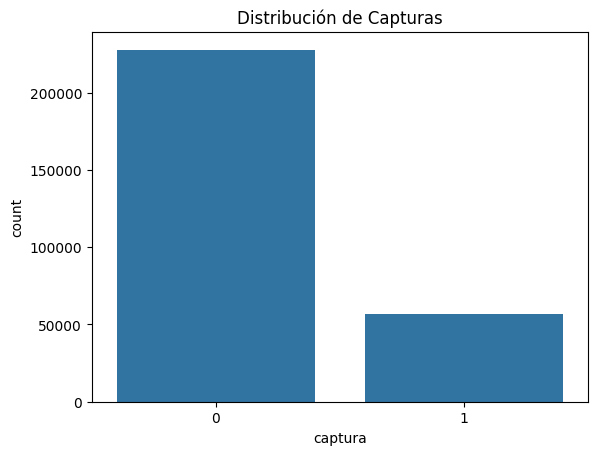

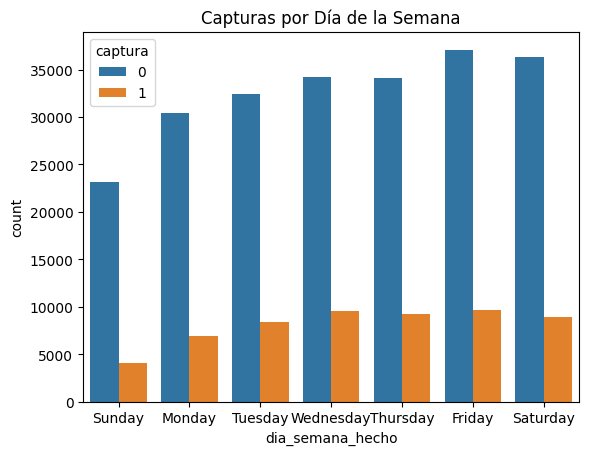

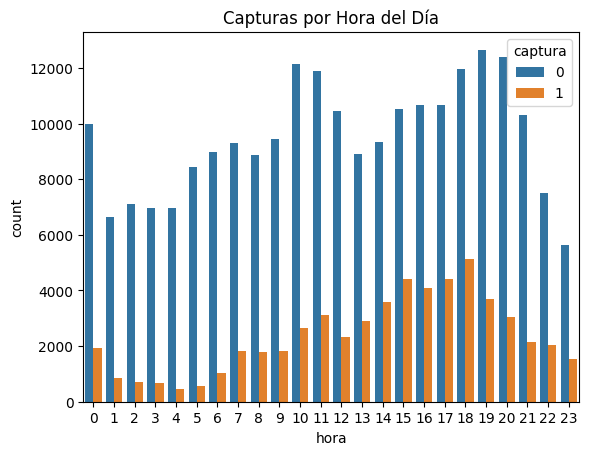

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar las capturas
captura_counts = hurto_a_persona['captura'].value_counts()

# Visualizar la distribución de capturas
sns.countplot(data=hurto_a_persona, x='captura')
plt.title('Distribución de Capturas')
plt.show()

# Visualizar otras variables
sns.countplot(data=hurto_a_persona, x='dia_semana_hecho', hue='captura')
plt.title('Capturas por Día de la Semana')
plt.show()

sns.countplot(data=hurto_a_persona, x='hora', hue='captura')
plt.title('Capturas por Hora del Día')
plt.show()

In [77]:
# Definir umbrales
time_window = timedelta(minutes=30)  # 30 minutos
distance_threshold = 0.1  # 0.1 kilómetros (100 metros)

# Convertir timestamps a datetime
hurto_a_persona['timestamp'] = pd.to_datetime(hurto_a_persona['fecha_hecho'])
capturas['timestamp'] = pd.to_datetime(capturas['fecha_hecho'])

# Crear columna de captura
hurto_a_persona['captura'] = 0

# Agrupar por tiempo (ejemplo: agrupar por cada hora)
hurto_a_persona['time_group'] = hurto_a_persona['timestamp'].dt.floor('H')
capturas['time_group'] = capturas['timestamp'].dt.floor('H')

# Inicializar la barra de progreso
time_groups = list(hurto_a_persona['time_group'].unique())
pbar = tqdm(total=len(time_groups), desc="Procesando grupos de tiempo")

# Iterar sobre cada grupo de tiempo
for time_group in time_groups:
    group_hurto = hurto_a_persona[hurto_a_persona['time_group'] == time_group]
    group_captura = capturas[capturas['time_group'] == time_group]

    if group_captura.empty:
        pbar.update(1)
        continue

    # Crear KD-Tree para el grupo de capturas
    coords_captura = group_captura[['latitud', 'longitud']].dropna().values
    tree = cKDTree(coords_captura)

    for index_hurto, row_hurto in group_hurto.iterrows():
        if pd.isnull(row_hurto['latitud']) or pd.isnull(row_hurto['longitud']):
            continue

        # Encontrar capturas cercanas en espacio
        distances, indices = tree.query((row_hurto['latitud'], row_hurto['longitud']), k=10, distance_upper_bound=distance_threshold)

        if isinstance(distances, float):
            distances = [distances]
            indices = [indices]

        # Filtrar capturas cercanas en tiempo
        for dist, idx in zip(distances, indices):
            if dist == np.inf:
                continue  # No hay más capturas cercanas

            row_captura = group_captura.iloc[idx]
            time_diff = abs(row_hurto['timestamp'] - row_captura['timestamp'])

            if time_diff <= time_window:
                hurto_a_persona.at[index_hurto, 'captura'] = 1
                break  # Si encontramos una captura, no necesitamos seguir buscando

    # Actualizar la barra de progreso después de procesar cada grupo
    pbar.update(1)

# Cerrar la barra de progreso
pbar.close()

# Verificar resultados
print(hurto_a_persona['captura'].value_counts())

Procesando grupos de tiempo: 100%|██████████| 72891/72891 [03:26<00:00, 353.11it/s]

captura
0    284545
Name: count, dtype: int64


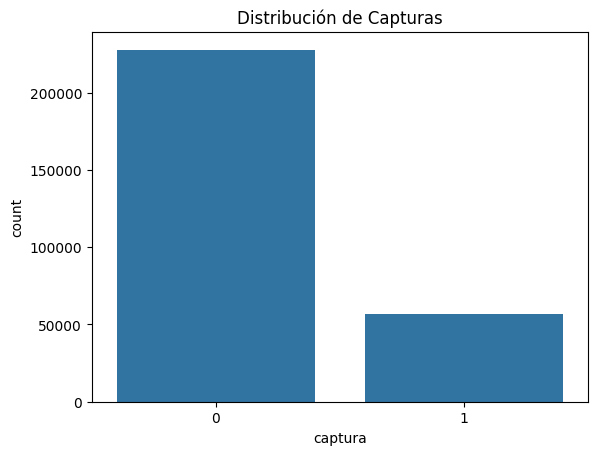

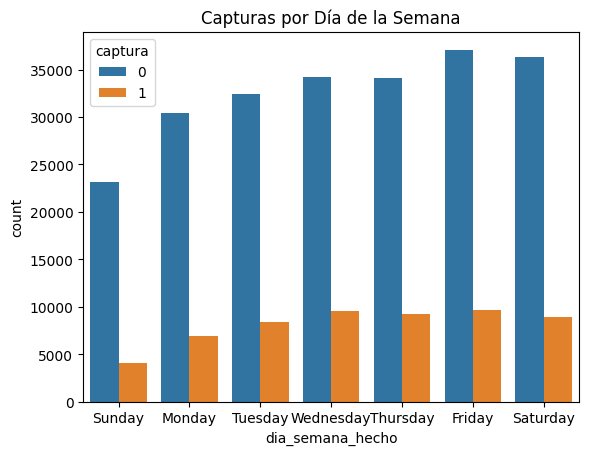

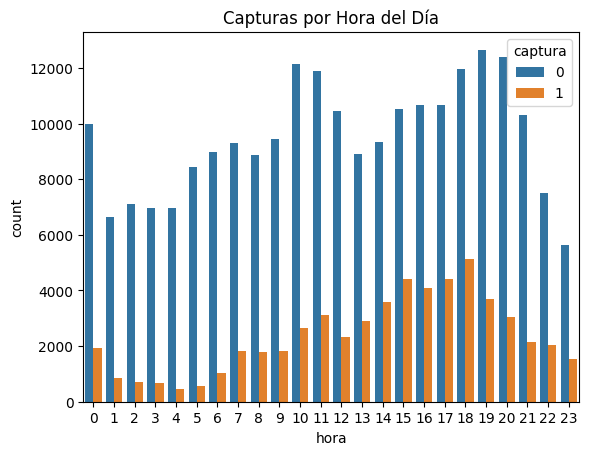

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar las capturas
captura_counts = hurto_a_persona['captura'].value_counts()

# Visualizar la distribución de capturas
sns.countplot(data=hurto_a_persona, x='captura')
plt.title('Distribución de Capturas')
plt.show()

# Visualizar otras variables
sns.countplot(data=hurto_a_persona, x='dia_semana_hecho', hue='captura')
plt.title('Capturas por Día de la Semana')
plt.show()

sns.countplot(data=hurto_a_persona, x='hora', hue='captura')
plt.title('Capturas por Hora del Día')
plt.show()

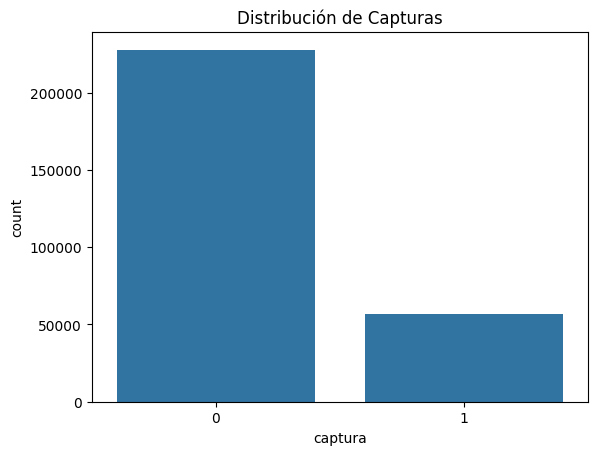

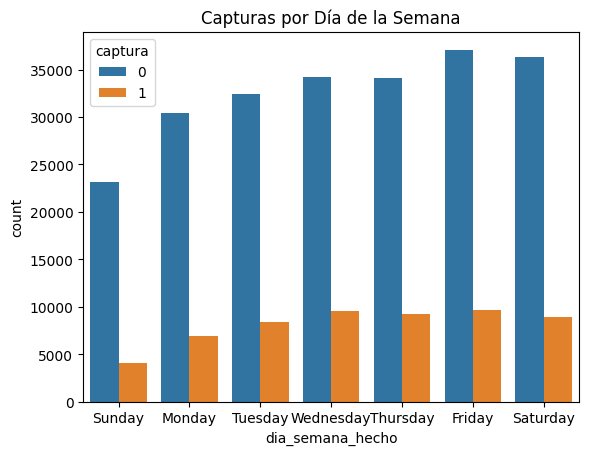

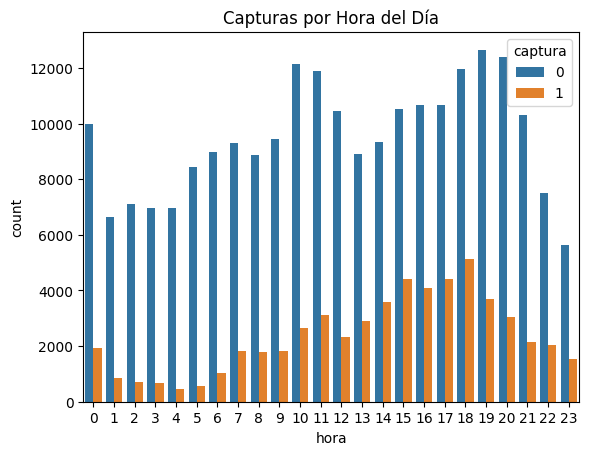

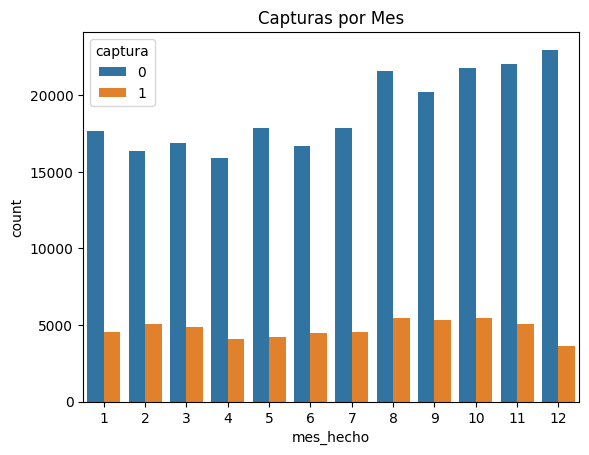

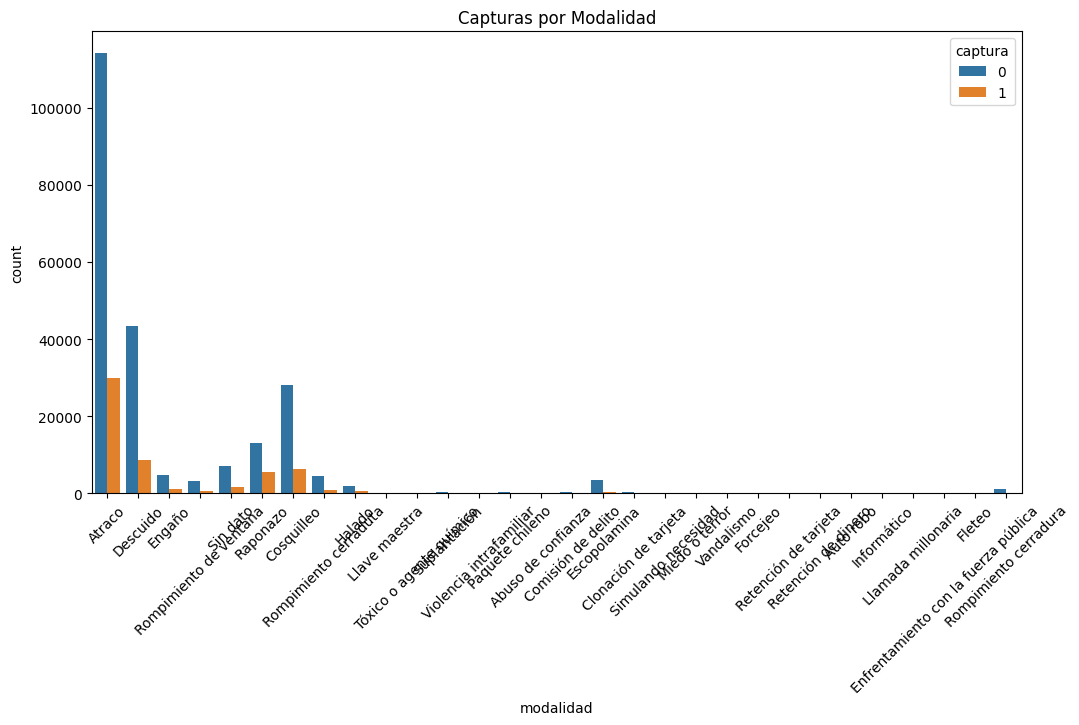

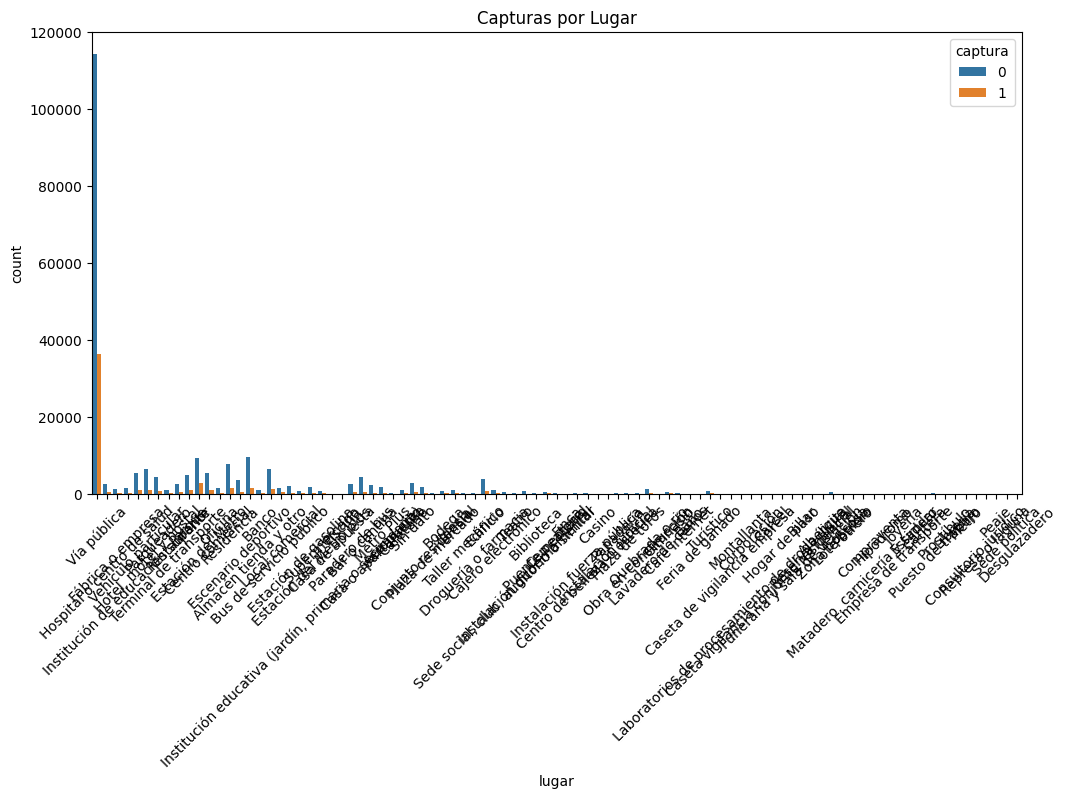

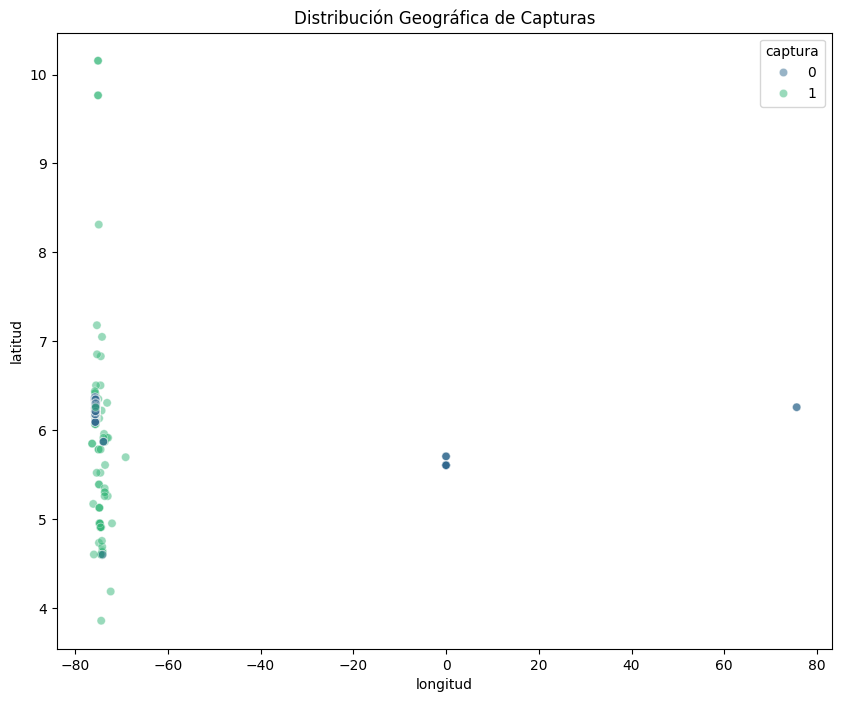

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar las capturas
captura_counts = hurto_a_persona['captura'].value_counts()

# Visualizar la distribución de capturas
sns.countplot(data=hurto_a_persona, x='captura')
plt.title('Distribución de Capturas')
plt.show()

# Visualizar capturas por día de la semana
sns.countplot(data=hurto_a_persona, x='dia_semana_hecho', hue='captura')
plt.title('Capturas por Día de la Semana')
plt.show()

# Visualizar capturas por hora del día
sns.countplot(data=hurto_a_persona, x='hora', hue='captura')
plt.title('Capturas por Hora del Día')
plt.show()

# Visualizar capturas por mes
sns.countplot(data=hurto_a_persona, x='mes_hecho', hue='captura')
plt.title('Capturas por Mes')
plt.show()

# Visualizar capturas por modalidad
plt.figure(figsize=(12, 6))
sns.countplot(data=hurto_a_persona, x='modalidad', hue='captura')
plt.title('Capturas por Modalidad')
plt.xticks(rotation=45)
plt.show()

# Visualizar capturas por lugar
plt.figure(figsize=(12, 6))
sns.countplot(data=hurto_a_persona, x='lugar', hue='captura')
plt.title('Capturas por Lugar')
plt.xticks(rotation=45)
plt.show()

# Distribución geográfica de capturas
plt.figure(figsize=(10, 8))
sns.scatterplot(data=hurto_a_persona, x='longitud', y='latitud', hue='captura', palette='viridis', alpha=0.5)
plt.title('Distribución Geográfica de Capturas')
plt.show()


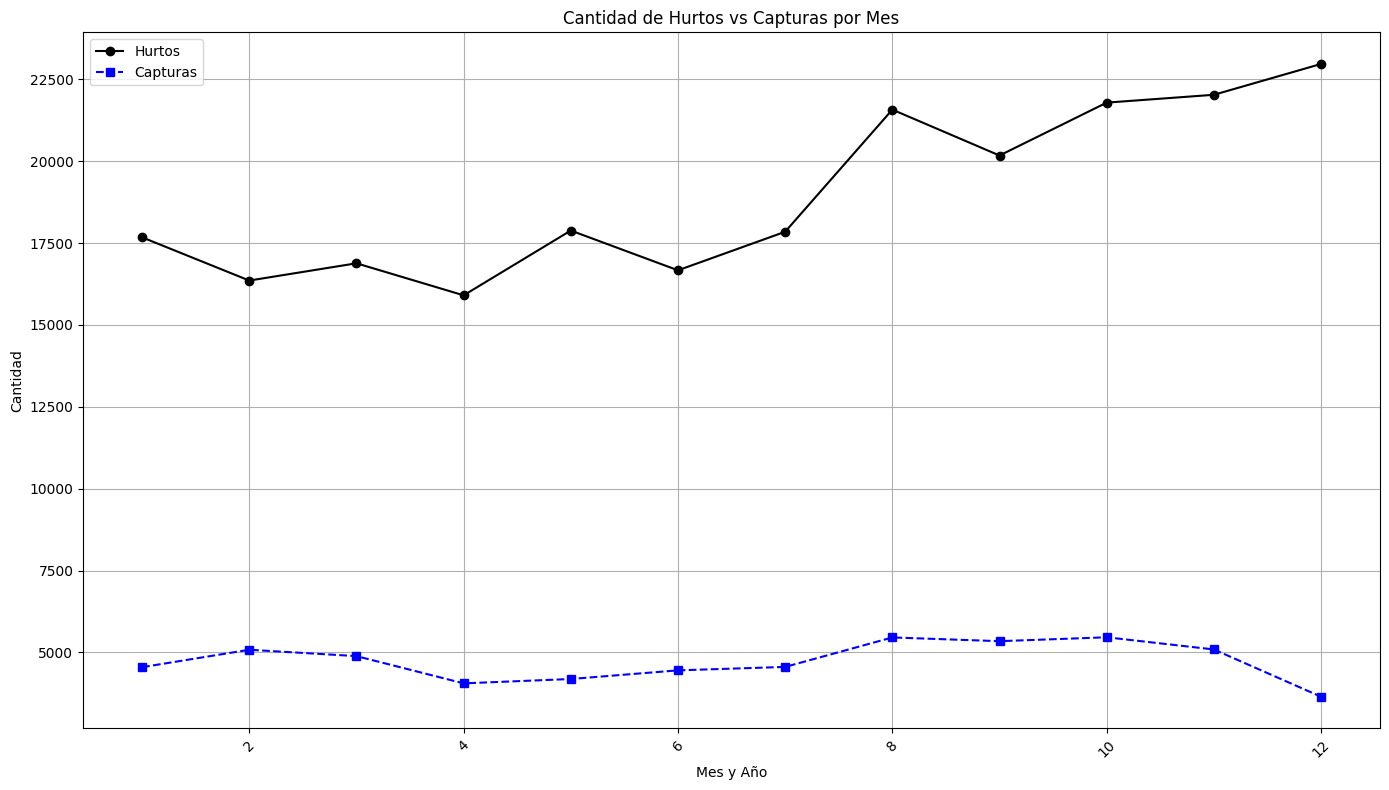

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear una columna de mes y año para hurto_a_persona

# Contar la cantidad de hurtos y capturas por mes y año
hurtos_por_mes = hurto_a_persona[hurto_a_persona['captura'] == 0]['mes_hecho'].value_counts().sort_index()
capturas_por_mes = hurto_a_persona[hurto_a_persona['captura'] == 1]['mes_hecho'].value_counts().sort_index()

# Crear el gráfico de línea de tiempo
plt.figure(figsize=(14, 8))

# Graficar la cantidad de hurtos por mes
plt.plot(hurtos_por_mes.index, hurtos_por_mes.values, label='Hurtos', marker='o', linestyle='-', color='black')

# Graficar la cantidad de capturas por mes
plt.plot(capturas_por_mes.index, capturas_por_mes.values, label='Capturas', marker='s', linestyle='--', color='blue')

# Añadir título y etiquetas de los ejes
plt.title('Cantidad de Hurtos vs Capturas por Mes')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()
